In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class AdalineGD():
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta
        self.n_iter=n_iter
#-------------------------------------------------------------------------    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])  +self.w_[0]
#------------------------------------------------------------------------- 
    def predict(self, X):
        return np.where(self.activation(X)>=0.0,1,-1)
    
#-------------------------------------------------------------------------
    def activation(self, X):
        return self.net_input(X)
#-------------------------------------------------------------------------
    def fit(self,X,y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        #for loop
        for i in range(self.n_iter):
            output=self.net_input(X)
            errors=y-output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        
        return self

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y=df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

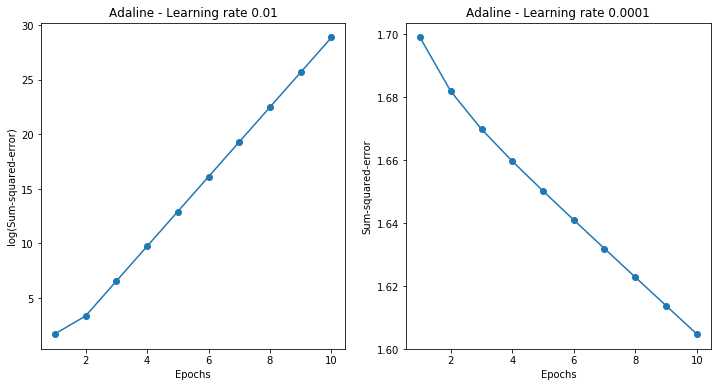

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ada1 = AdalineGD(eta=0.01, n_iter=10).fit(X, y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_), marker='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(eta=0.0001, n_iter=10).fit(X, y)
ax[1].plot(range(1,len(ada2.cost_)+1),np.log10(ada2.cost_), marker='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [4]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min,x1_max=X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
   # print(Z, Z.shape, xx1.shape, xx2.ravel().shape)
    Z = Z.reshape(xx1.shape)
   # print(Z, Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        #print(idx, cl)
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        


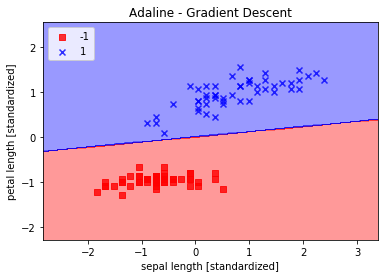

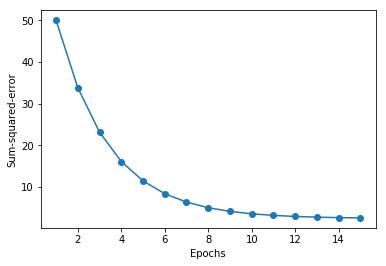

In [5]:
#standardization
X_std=np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

a=AdalineGD(n_iter=15, eta=0.01)
a.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=a)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(a.cost_) + 1), a.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
